Template Matching in Image Processing


**1. Normalization:**

Purpose: To make the template matching process invariant to scale and lighting changes, normalization is often applied to both the template and the search window (a sub-region of the larger image).
Method: A common normalization method is the Min-Max Scaler, which scales pixel values to a specific range, typically [0, 1] or [0, 255]. This ensures that the pixel intensity values are consistent across the image and template, reducing the impact of varying lighting conditions.

**2. Sliding the Template:**

Purpose: To search the entire image for regions that match the template.
Method: The template is systematically slid over the image, moving pixel by pixel. At each position, the template is aligned with a sub-region of the image, known as the search window. This process is repeated until the entire image has been covered.

**3. Similarity Check:**

Purpose: To determine how closely the template matches the current search window.
Method: One of the simplest and most common methods for similarity checking is the Sum of Squared Differences (SSD). SSD calculates the sum of the squared differences between corresponding pixel values in the template and the search window.



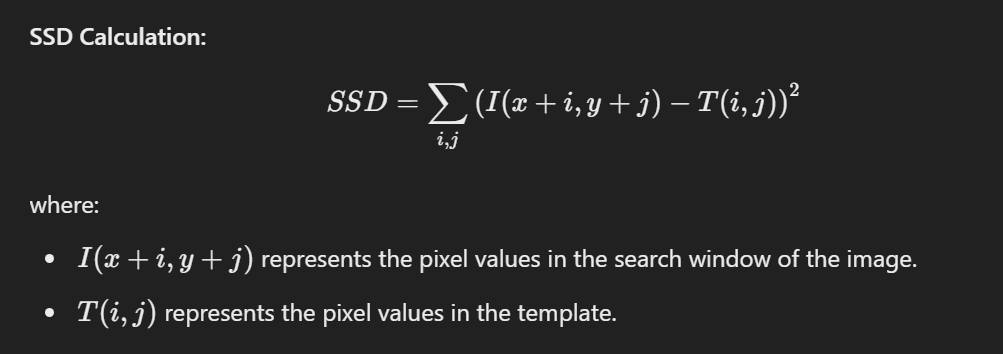

**Interpreting SSD:**

**Low SSD Value:** Indicates a close match, meaning the pixel values in the template and the search window are very similar. If the SSD value is close to zero, it suggests a strong match.

**High SSD Value:** Indicates a poor match, meaning there is a significant difference between the pixel values in the template and the search window.

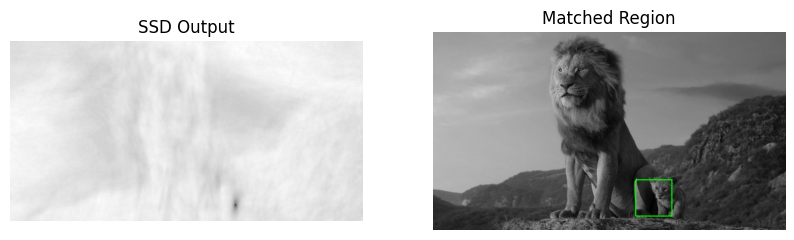

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the main image and the template image in grayscale
image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
template = cv2.imread('template.png', cv2.IMREAD_GRAYSCALE)

# Get dimensions of the template
template_height, template_width = template.shape

# Create an output image to store the SSD values
ssd_output = np.zeros((image.shape[0] - template_height + 1, image.shape[1] - template_width + 1))

# Slide the template over the image
for y in range(ssd_output.shape[0]):
    for x in range(ssd_output.shape[1]):
        # Extract the region of interest from the image
        roi = image[y:y+template_height, x:x+template_width]

        # Compute the SSD between the template and the region of interest
        ssd = np.sum((roi - template) ** 2)

        # Store the result in the output image
        ssd_output[y, x] = ssd

# Find the location with the minimum SSD
min_val = np.min(ssd_output)
min_loc = np.unravel_index(np.argmin(ssd_output), ssd_output.shape)

# Draw a rectangle around the matched region
top_left = min_loc[::-1]
bottom_right = (top_left[0] + template_width, top_left[1] + template_height)
matched_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.rectangle(matched_image, top_left, bottom_right, (0, 255, 0), 2)

# Display the matched region
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('SSD Output')
plt.axis("off")
plt.imshow(ssd_output, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Matched Region')
plt.axis("off")
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.show()

**Note :** Here the Normalisation is not done XD